Study note of LLAMA2's transformer architecture
https://www.youtube.com/watch?v=Mn_9W1nCFLo

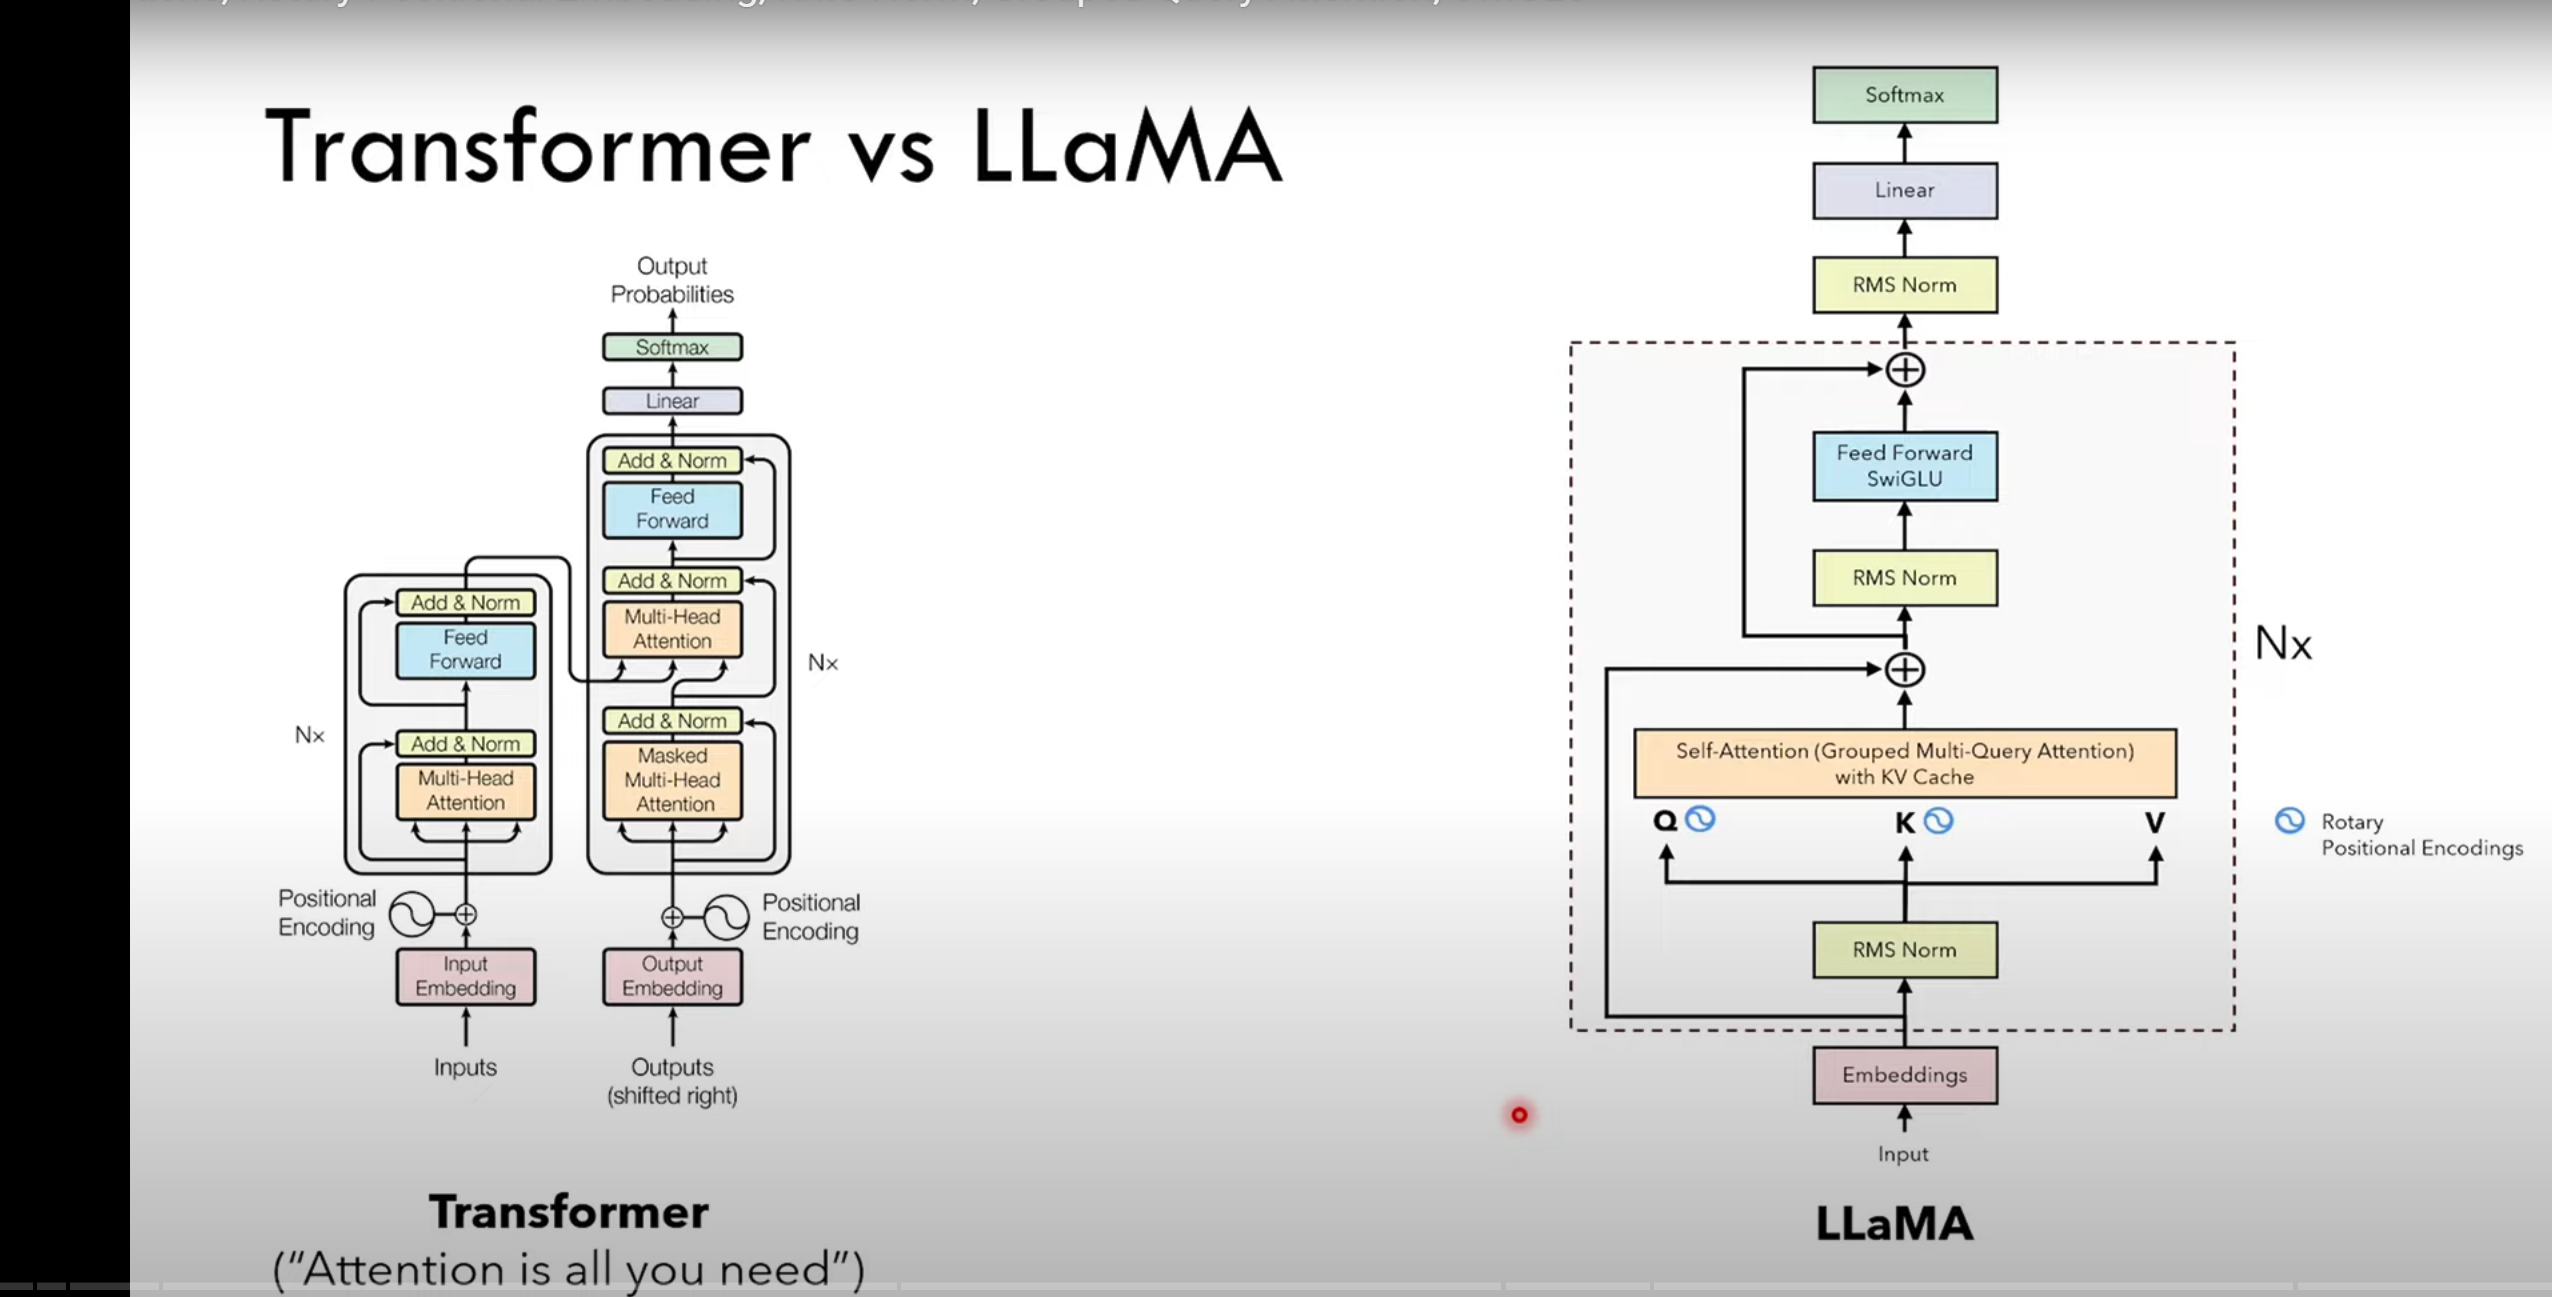

# Normalization & RMS Norm



*   **Why is normalisation needed?**

normalisation stablizes the weights
During training, if the weights of the previous layers changes too much, the next layers would not know what to do because they have not seen the new input

*   **Typical normalization**

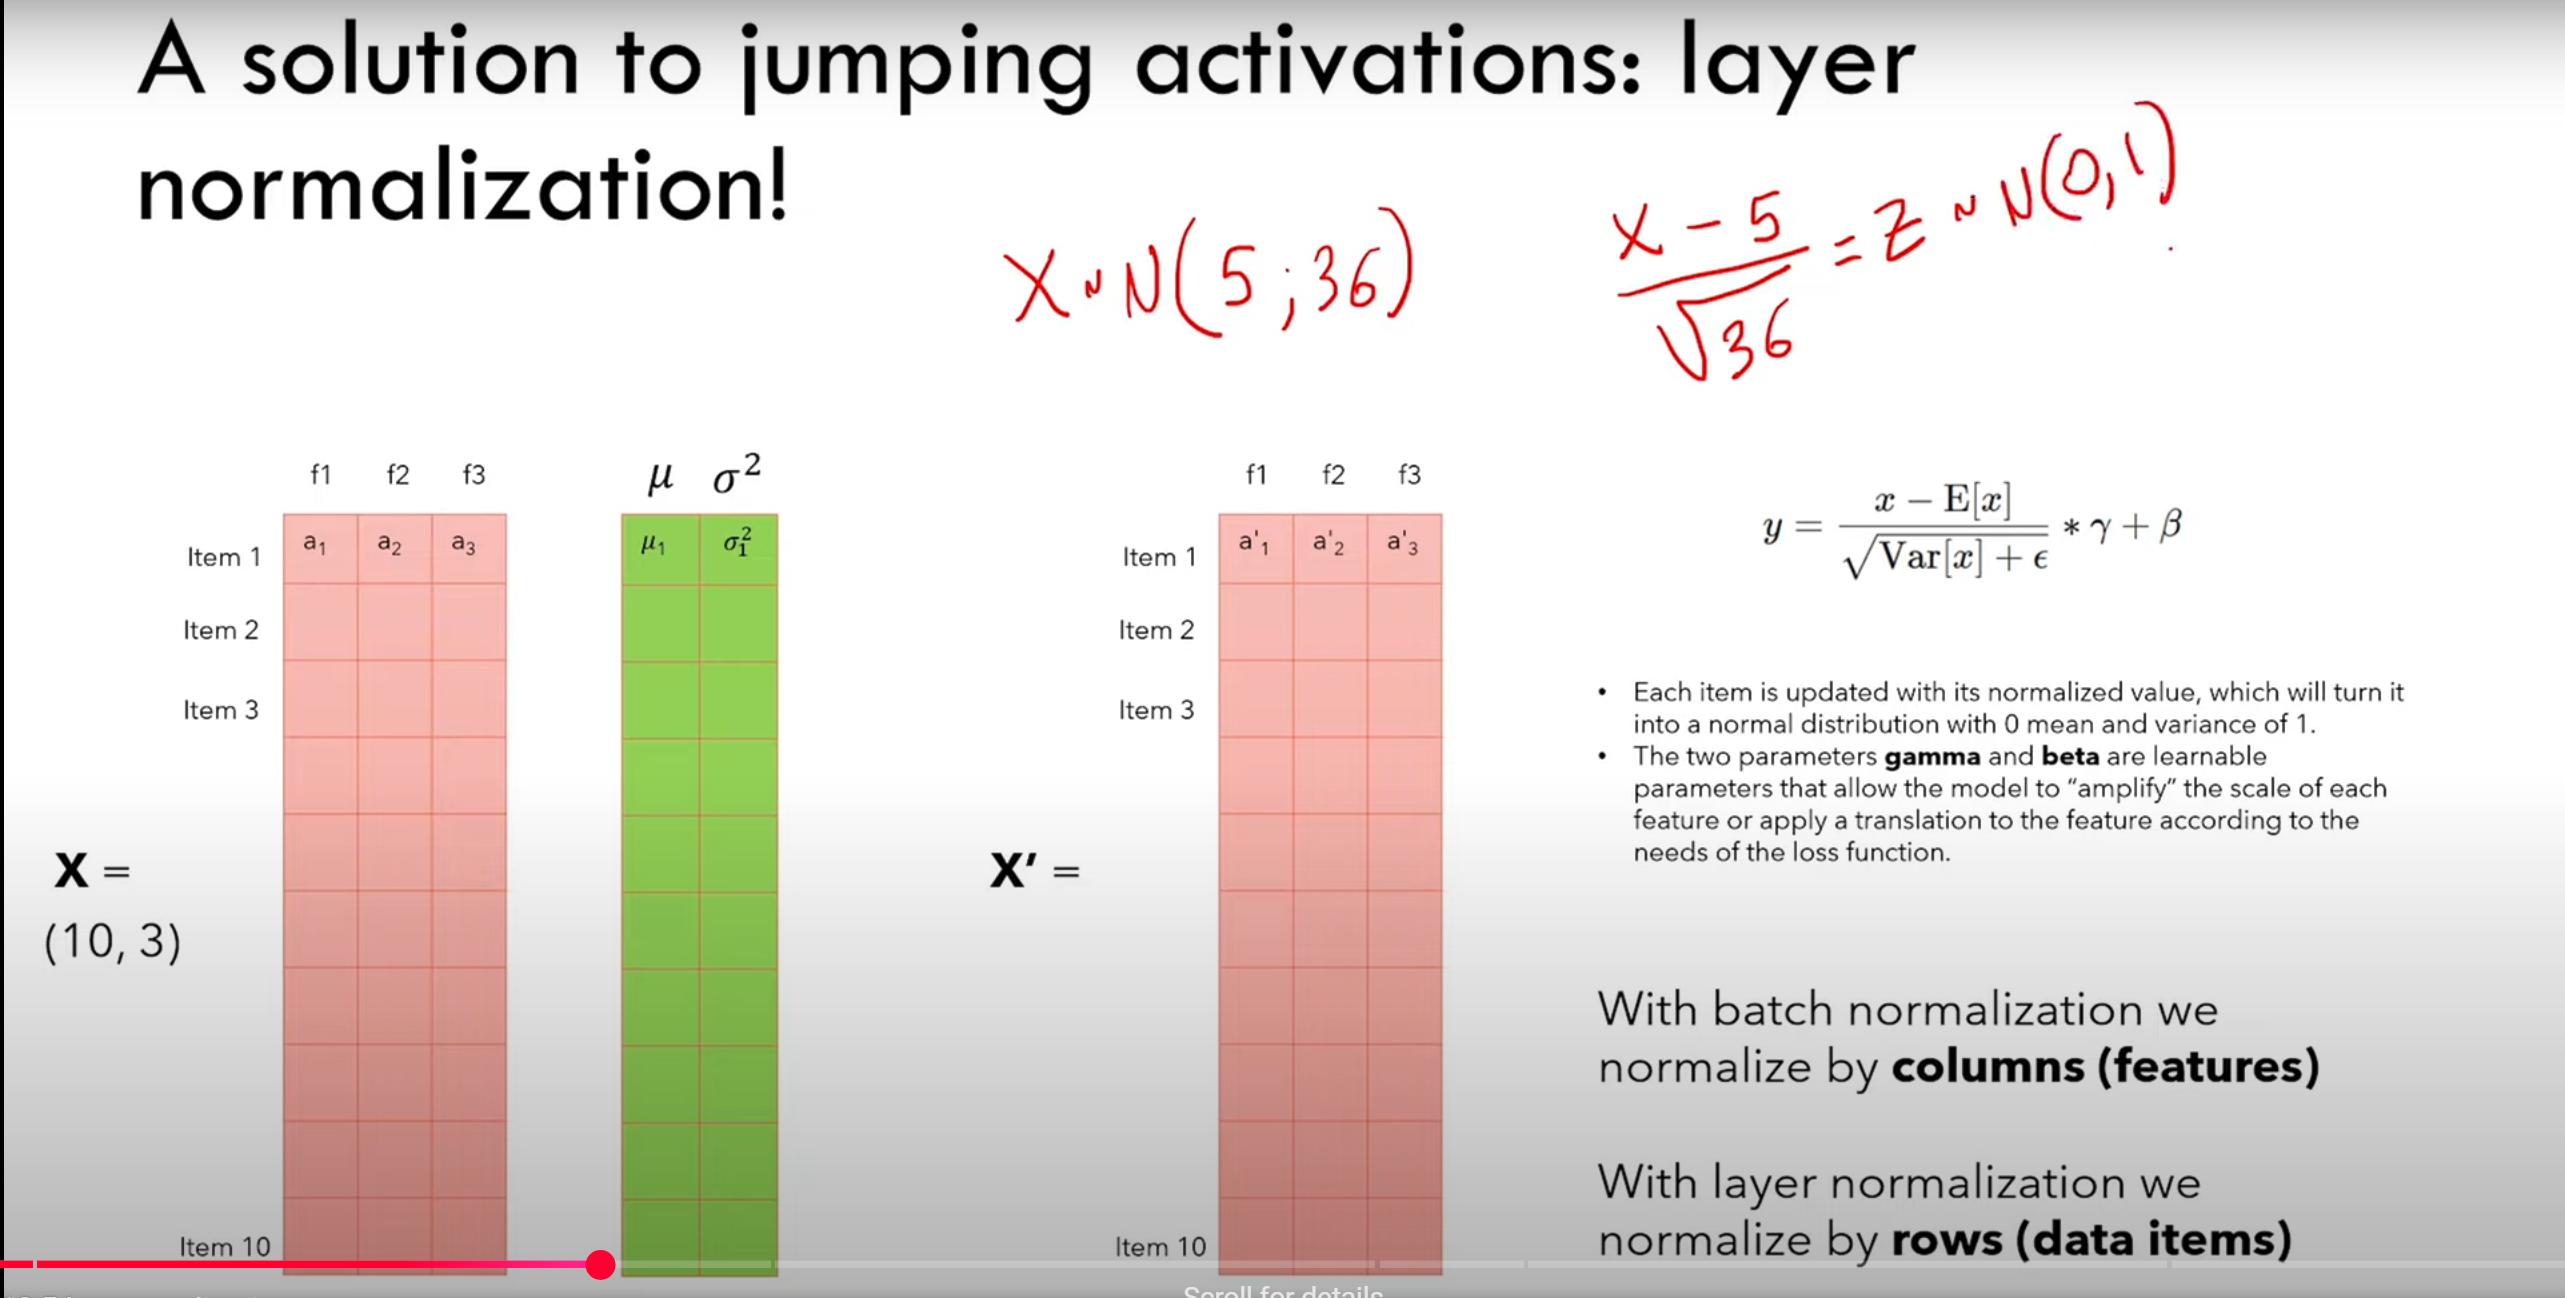

*   **RMS Normlaization**

LLAMA2 uses RMS normlaization which is less computationally expensive

# Rotary Positional Encoding

*   **Rotary Positional Encoding**

Rotary Positional Encoding encodes the distance information relatively.

Uses Rotation matrix to represent the distance but the math is too complicated.

Applied to Q and K after multiplication of W_Q and W_K, whereas positional encoding is applied before this for vanilla transformer

The further the distance, the less the intensity





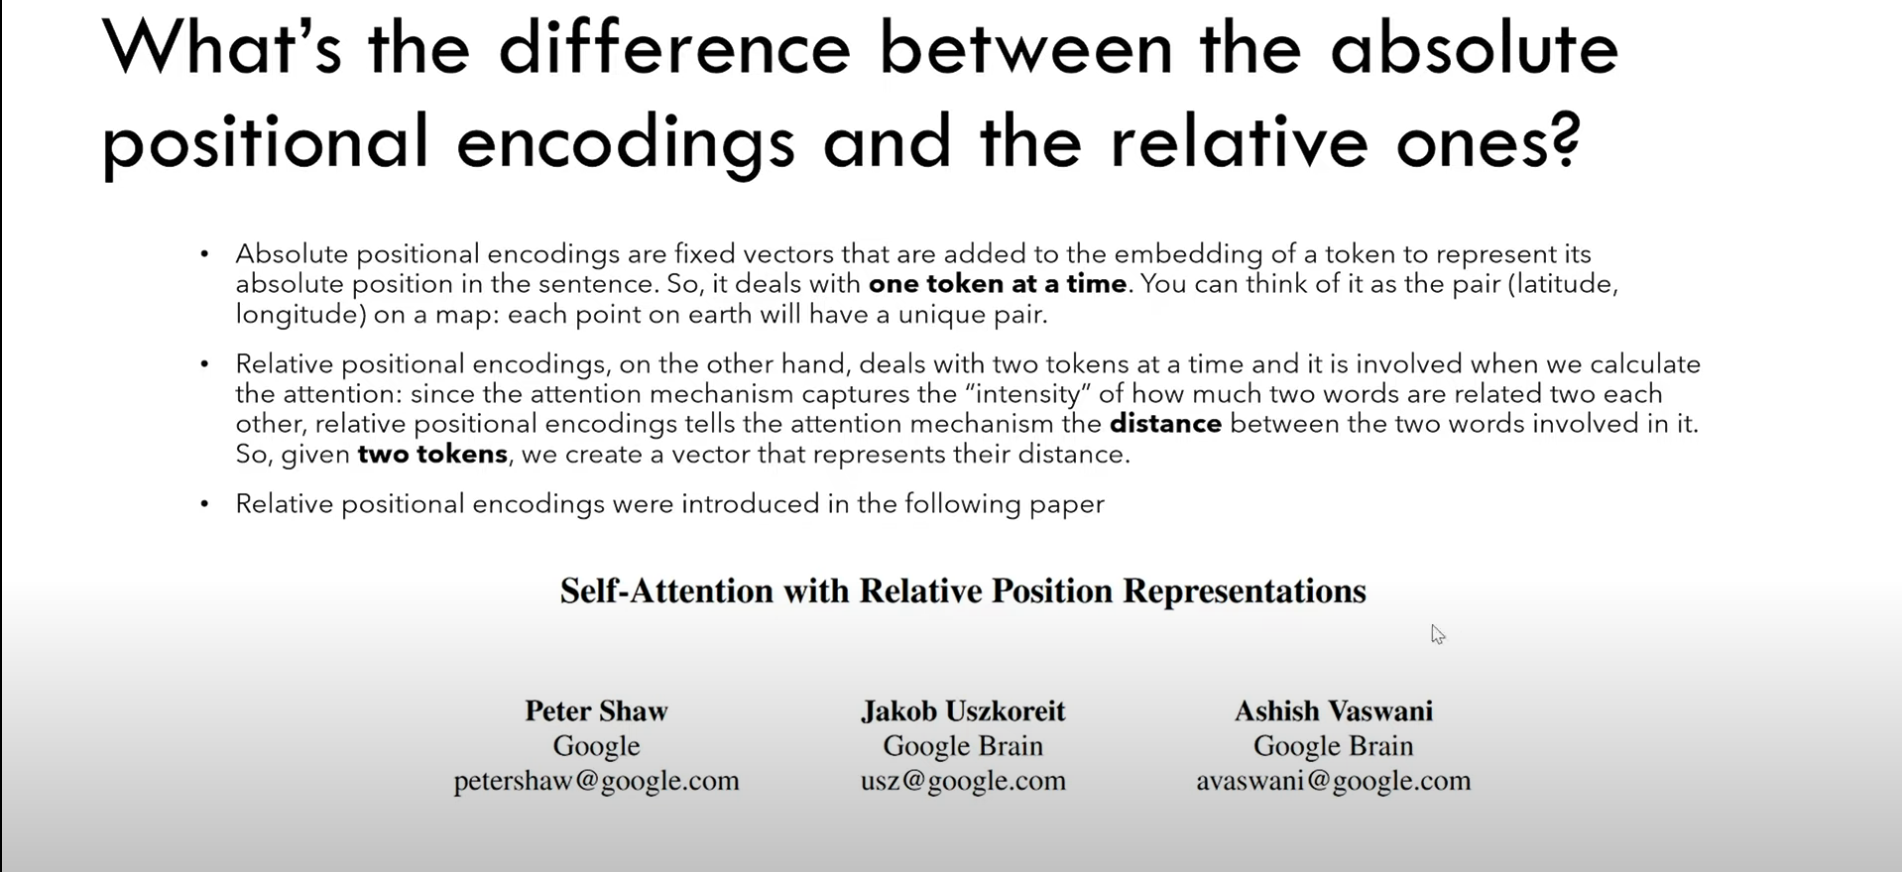

# KV Cache


**Inferencing without KV cache**

we only care about the final token but the whole sequence needs to be computed
at every step

Input: [SOS]

Output: a

Input: [SOS] a

Output: a b

Input: [SOS] a b

Output: a b c

Input: [SOS] a b c

Output: a b c d

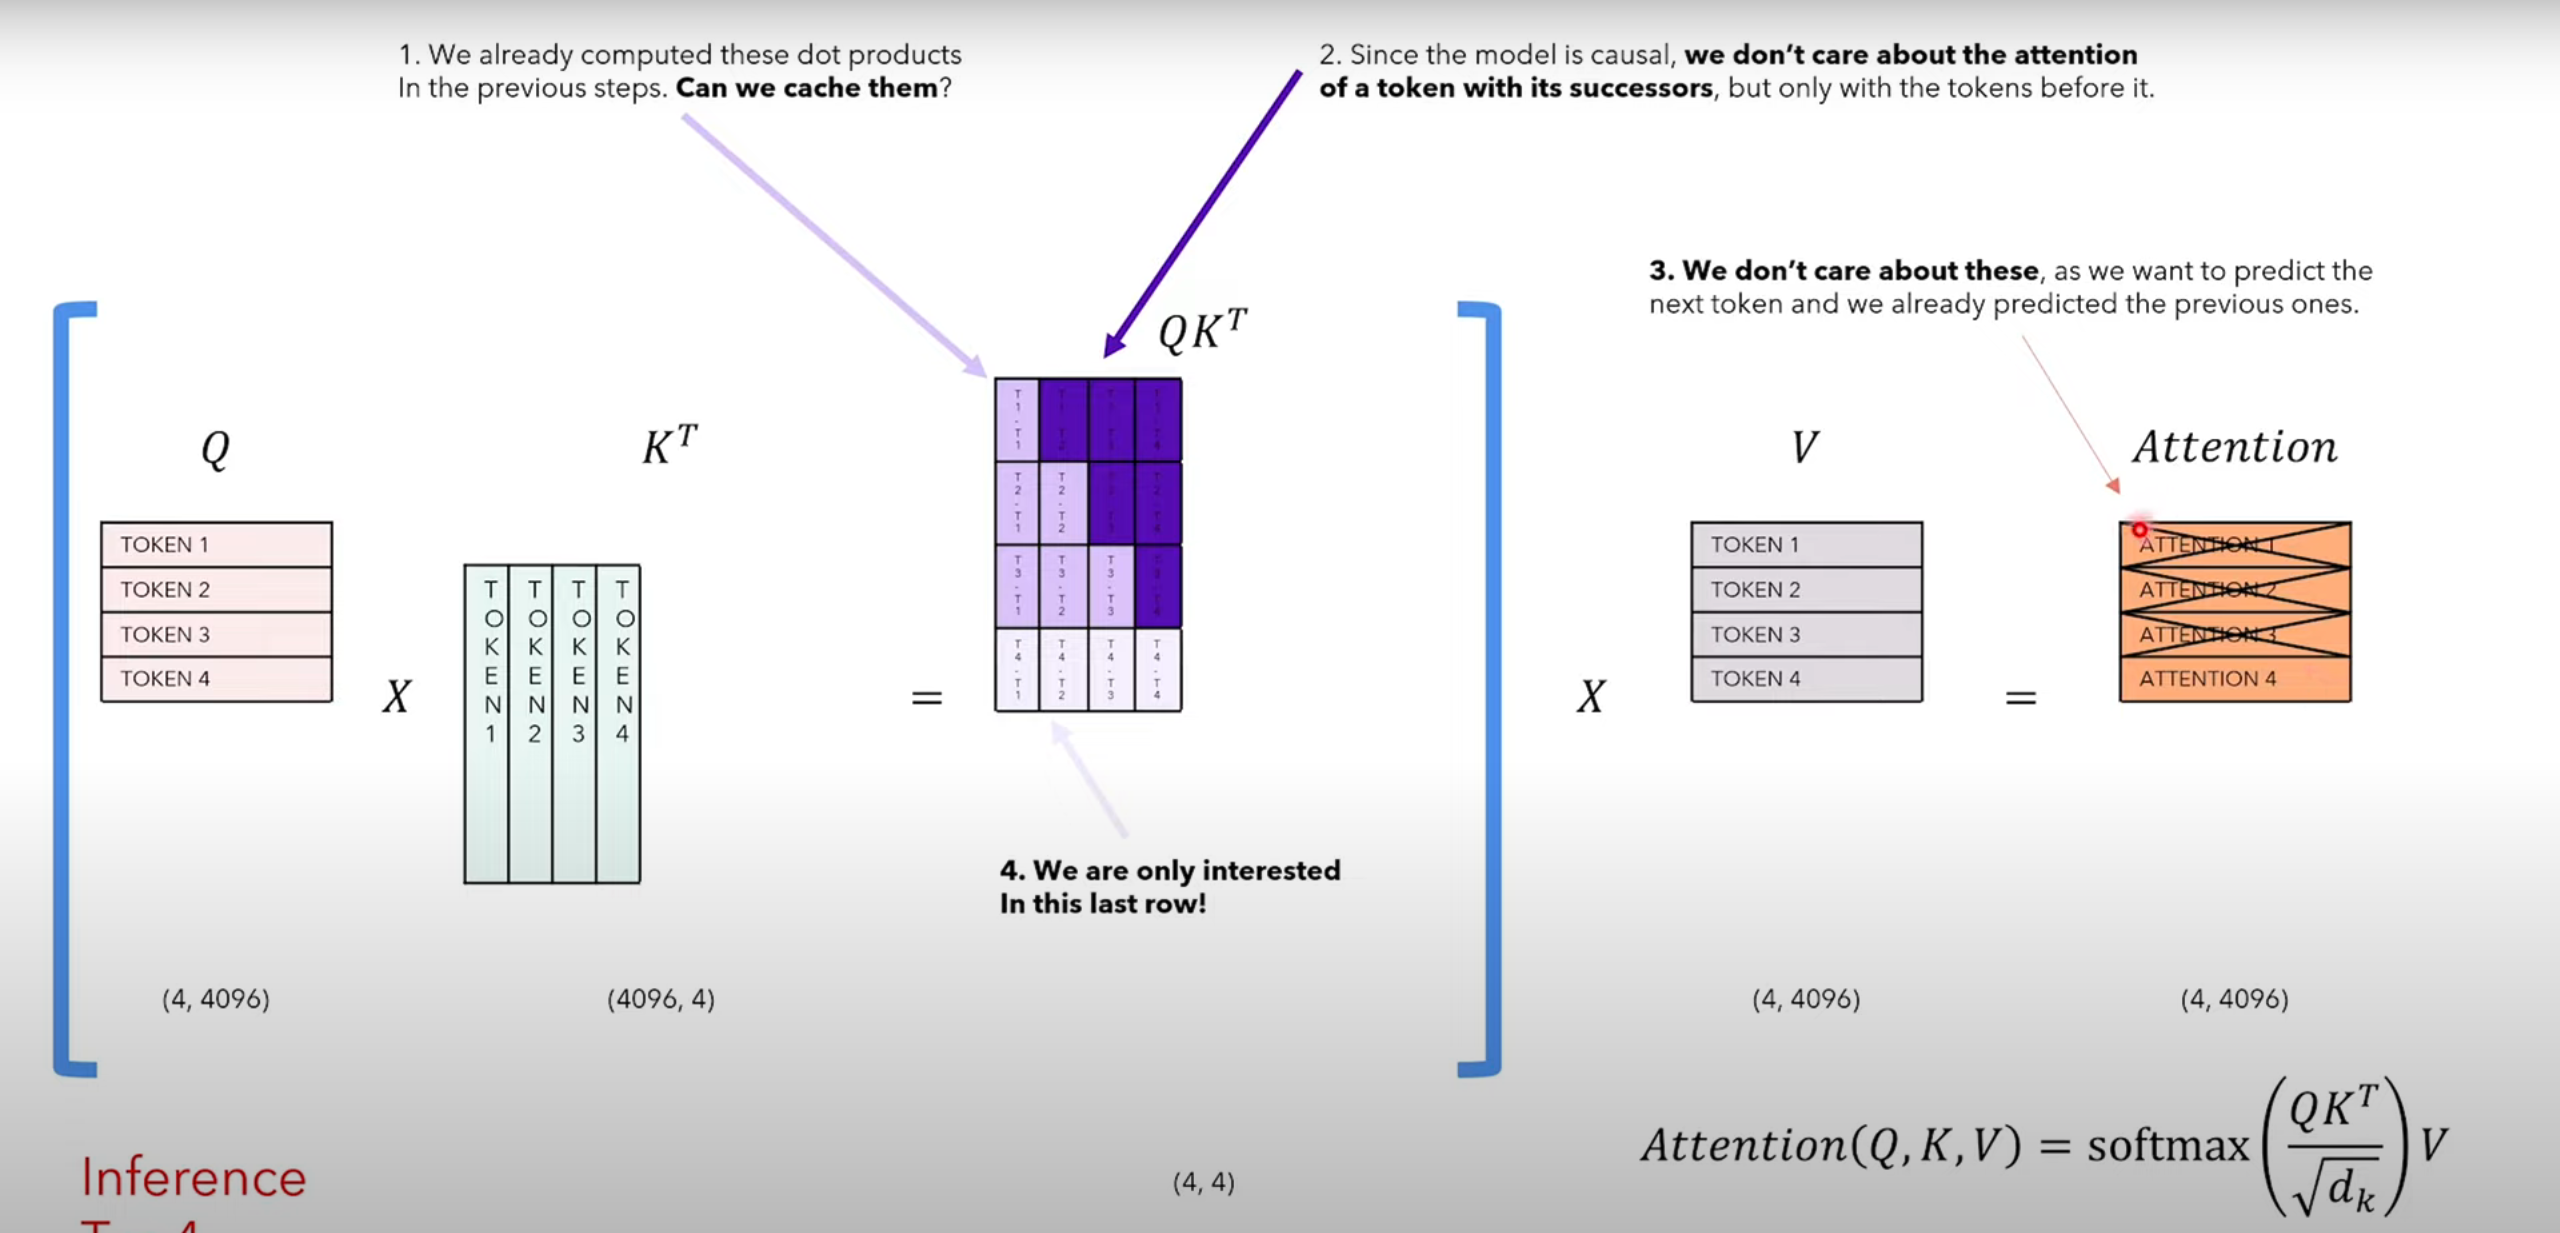

**Inferencing with KV cache**

Keep a cahe of K and V, use the latest token as Q at every step

Input: [SOS]
Output: [SOS] a

Input: [a]
Output: [SOS] a b

Input: [b]
Output: [SOS] a b c

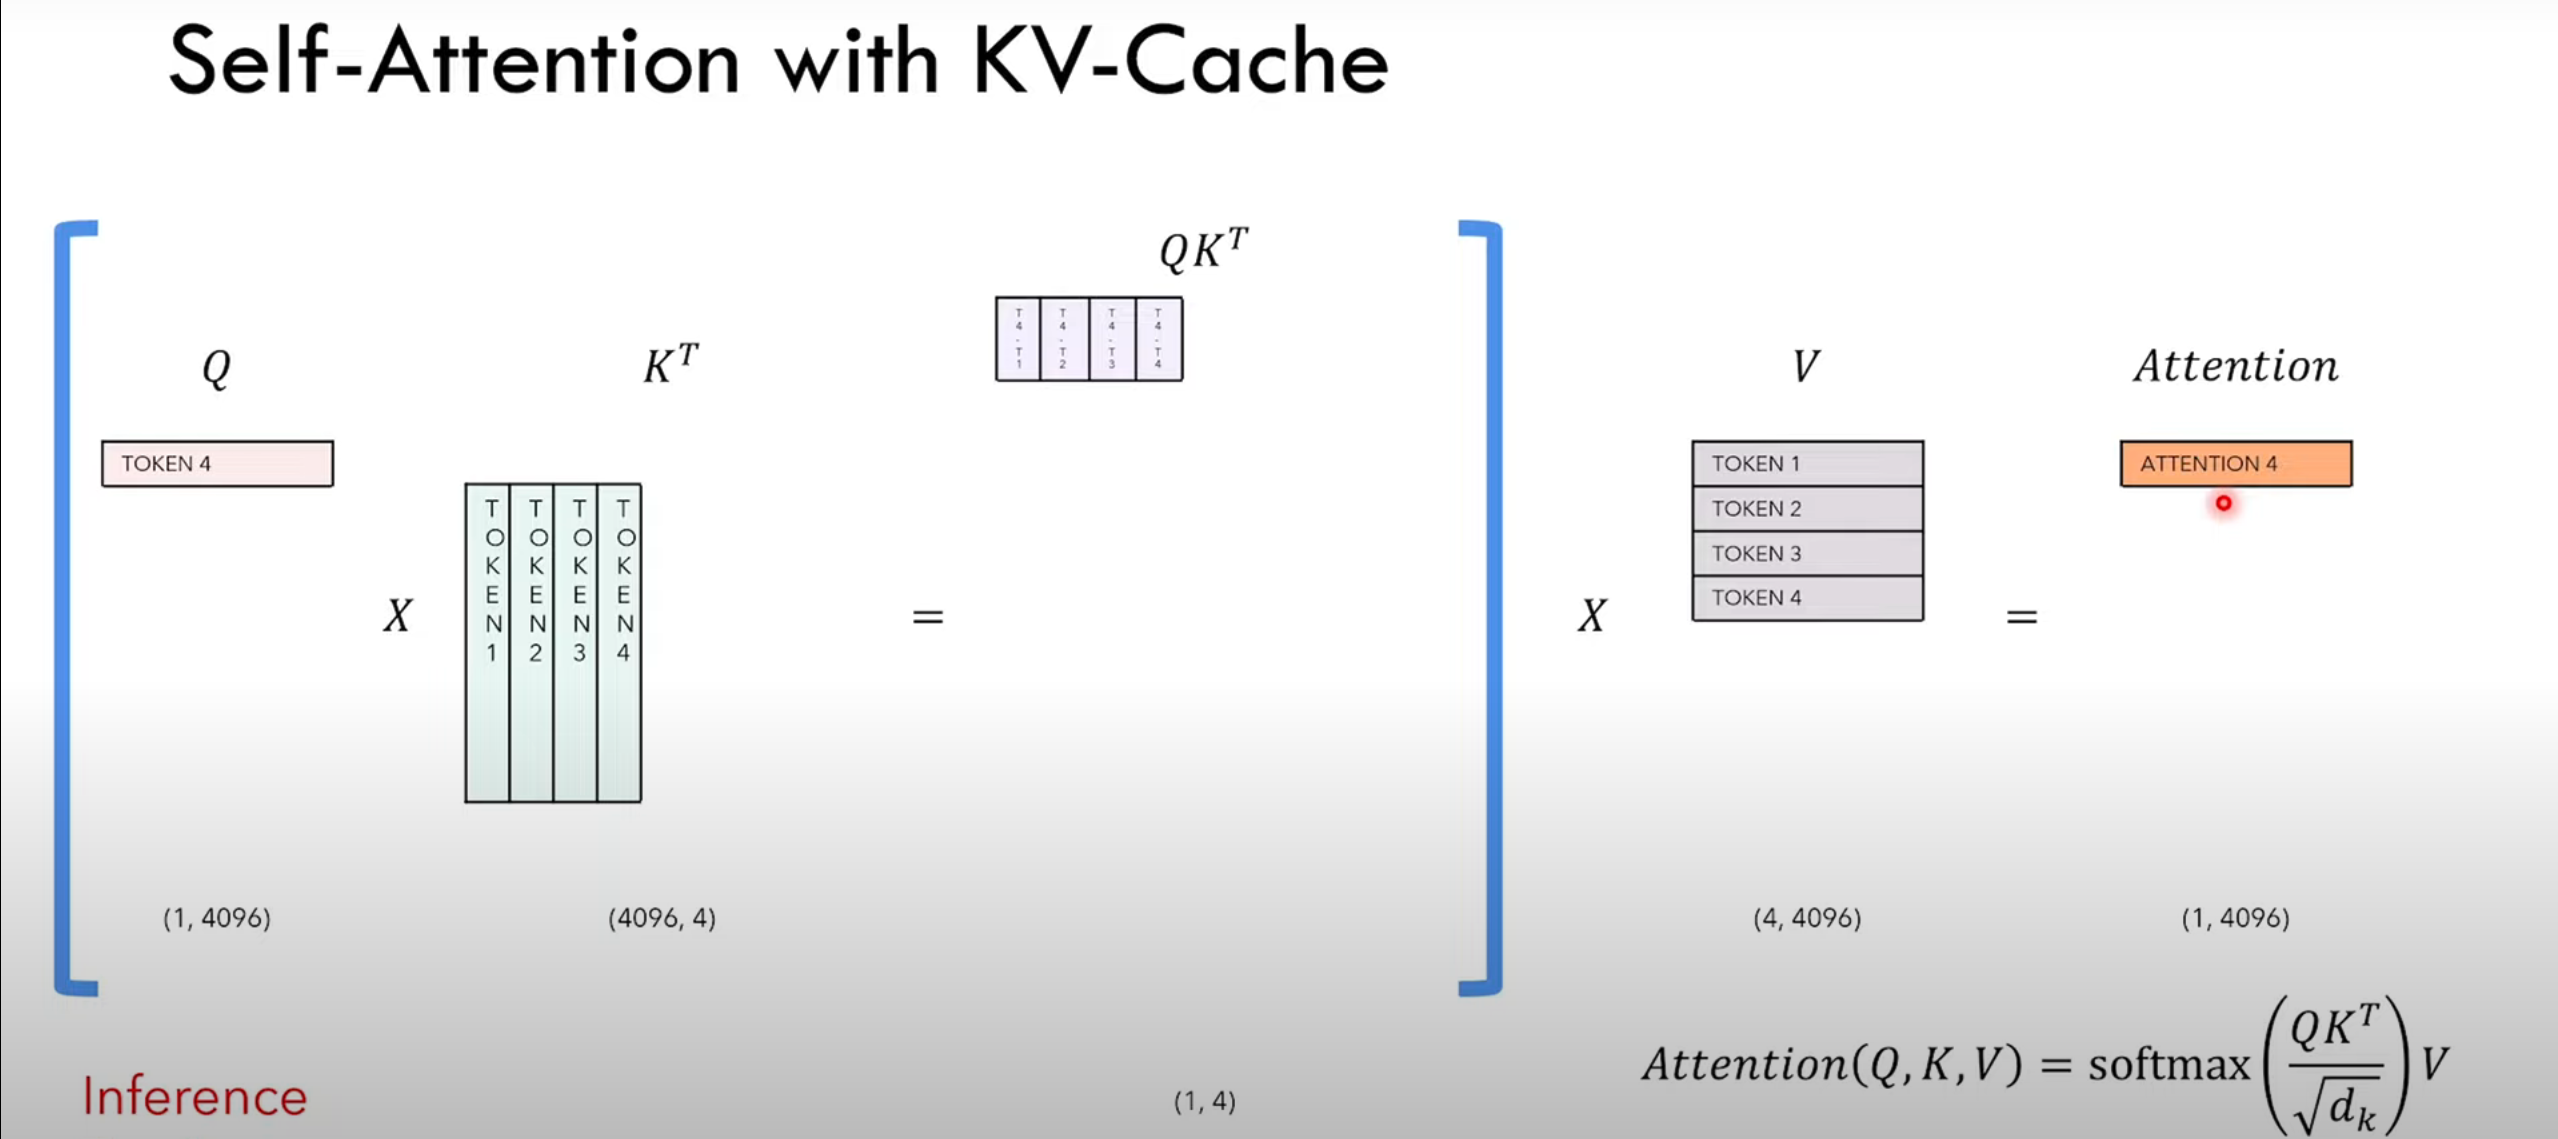

# Grouped MQA (Multi-Query Attention)



*   **Why MQA**

KV Cache greatly reduces the computation in the GPU, but now the bottle neck became the GPU's memory bandwidth, So we want to reduce memory access and reallocation.

MQA: Instead of multi-head, only implement multi-Q, leave K and V shared. Little loss in performance, 10 times faster inference speed
*   **Grouped MQA**
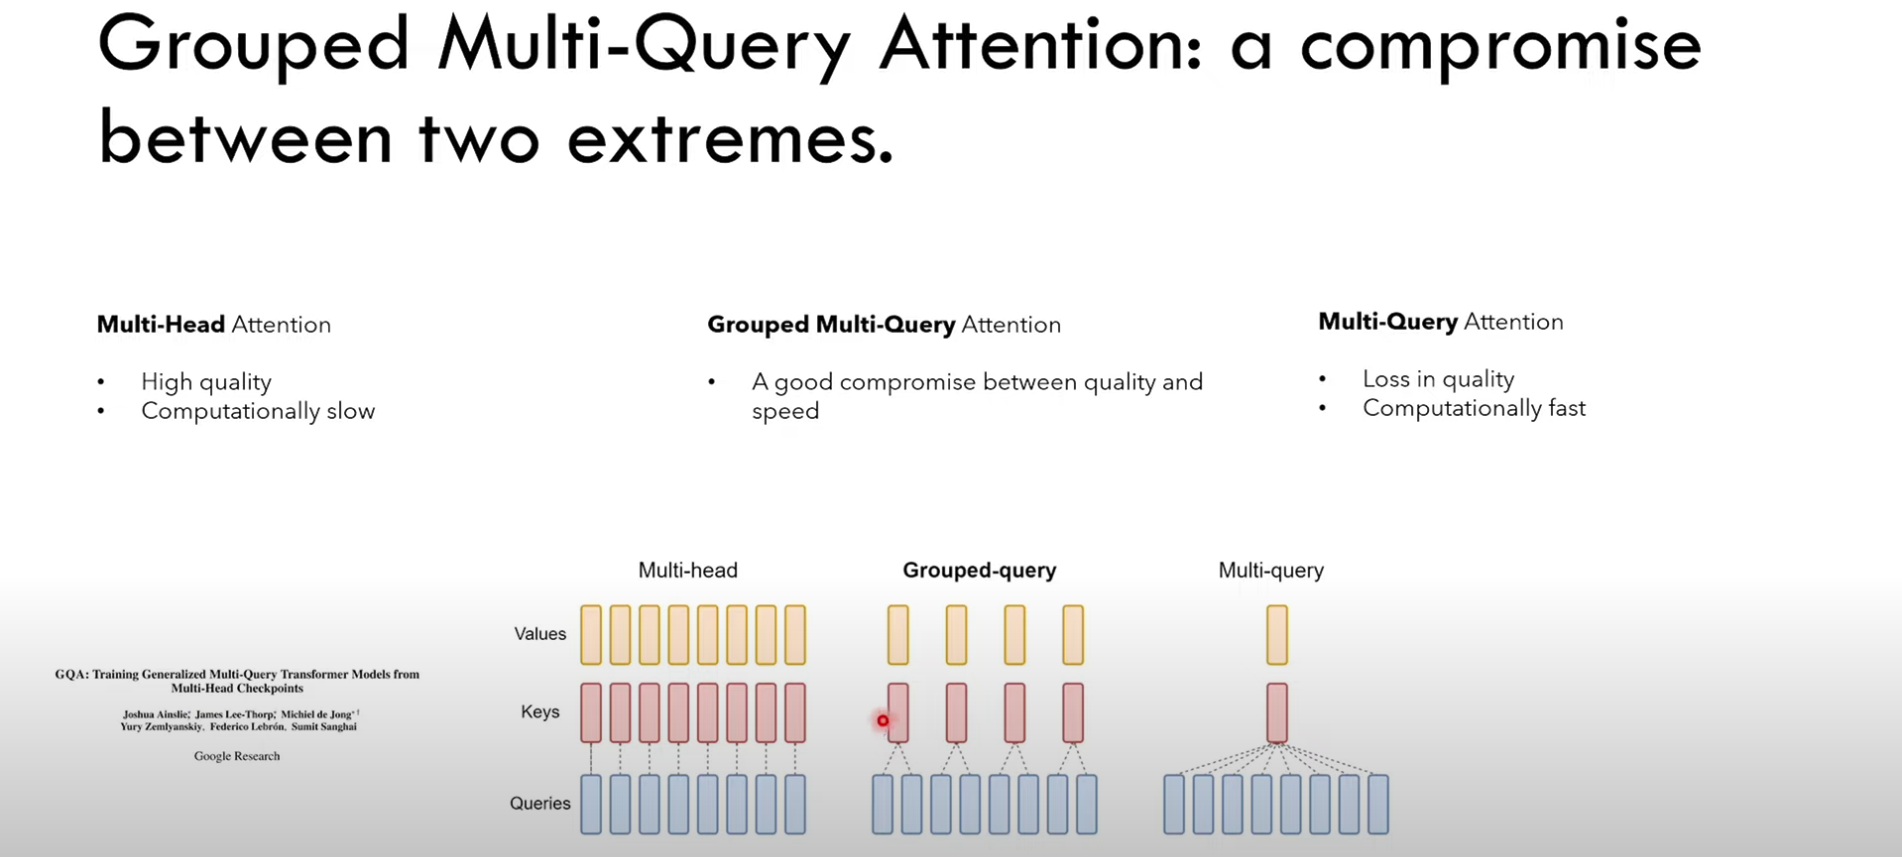


# SwiGLU Activation function

Similar to Relu but allow a negative curve to the left of 0.

Slightly better performance but not sure why